# Generic EDA for exploring new Datasets

Pandas-based code for small datasets or samples. Performs a generic EDA for structured and semi-structured datasets and provides data exploration visualization. Generates a PDF report with the relevant information, including:

- Dataset name, source and version
- Dataset size and dimensions
- Duplicates detection
- Time Series data detection
- Descriptive analysis of columns
- Data Quality Assessment

---

raul.arrabales@gmail.com - Jun '23

---
More info and updates at:<br> [Raul repo for DataScience Enablement - Generic EDA](https://github.com/raul-arrabales/DataScience_Enablement/blob/main/Generic_EDA.ipynb)

### Report settings

In [1]:
# Threshold of percentage of missing values in a column to raise a warning
PCT_MISSING_THRESHOLD = 20 # Warn me if there's more than 20% missing values in a column. 

# Threshold of percentage of duplicated rows to raise a warning
PCT_DUPLICATED_ROWS = 10 # Warn me if there's more than 10% duplicated rows. 


### Libs

In [2]:
# Path manipulation
import os 

# dataset manipulation
import pandas as pd 
import numpy as np

# PDF report generation
from fpdf import FPDF

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Managing dates
from datetime import datetime
from pandas.api.types import is_datetime64_any_dtype as is_datetime

### Dataset Identification

In [3]:
# Dataset details, for loading and report
dataset_path = "data/Prolexitim_Jan23_En.csv"
dataset_name = os.path.basename(dataset_path)
dataset_source = dataset_path
dataset_version = "Jan23_En"

# Dataset configuration for loading
dataset_format = "csv"
dataset_hasHeader = 0
dataset_separator = ','

### Misc Config

In [4]:
# Random seed
r_seed = 41

### PDF Report formatting

In [5]:
# Document author
pdf_author = "raul.arrabales"

# Margin
pdf_margin = 10 

# Page width: Width of A4 is 210mm
pdf_width = 210 - 2*pdf_margin

# Cell height
pdf_cell_heigth = 50

In [6]:
# My PDF template
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 8, dataset_name + ' EDA', 0, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 8, f'Page {self.page_no()}', 0, 0, 'C')
          
# Create empty doc
pdf = PDF()
pdf.add_page()

In [7]:
def duoprint(text, pdf, marker=False, warning=False, box=False):
    """ Prints the input both in the PDF and output
    - marker: indicates a yellow background and bold font
    - warning: indicates the message is a warning
    - box: indicated a border around text cell
    """
    text_height = 10 # default line height 
    print_border = 0 # no border, by default
    
    if (marker): # Bold and yellow fill
        pdf.set_font('Arial', 'B', 12)
        pdf.set_fill_color(r=248, g=230, b=145)
    else:
        pdf.set_font('Arial', '', 12)
        
    if (warning): 
        pdf.set_text_color(r=255, g=95, b=21) # orange
        
    if (box): 
        print_border = 1
        text_height = 14
        pdf.set_font('Arial', 'B', 14)
        
    pdf.cell(w=0, h=text_height, txt=text, border=print_border, ln=1, fill=marker)
    pdf.set_text_color(r=0, g=0, b=0)
    print(text)

In [8]:
def blank_line(pdf, height=8):
    """ Prints an empty line in the PDF. 
    - height: indicated height of blank line
    """
    pdf.ln(height)

In [9]:
def print_table(df, title, pdf):
    """ Prints a df as a table in the PDF
    """
    text_height = 6 # default line height
    text_width = 40
    ln_flag = 0 # Change line flag
    
    # Table Header
    pdf.set_font('Arial', 'B', 12)
    for c in df.columns:
        if c == df.columns[len(df.columns)-1]:
            ln_flag = 1
        pdf.cell(w=text_width, h=text_height, txt=c, border=1, ln=ln_flag, align='C')
        
    pdf.ln(1)
    ln_flag = 0
    
    # Table contents
    pdf.set_font('Arial', '', 12)
    for i in range(0, len(df)):
        ln_flag = 0
        for c in df.columns:
            if c == df.columns[len(df.columns)-1]:
                ln_flag = 1
            # format text
            text = str(df[c].iloc[i])
            try:
                num = float(text)
                text = f'{num:.2f}'
            except ValueError:
                text = text.strip() 
            pdf.cell(w=text_width, h=text_height, txt=text, border=1, ln=ln_flag, align='C')
    
    pdf.ln(1)

### Dataset metadata and dataset loading

In [10]:
if (dataset_format == 'csv'):
    df = pd.read_csv(
        dataset_path,
        header=dataset_hasHeader,
        delimiter=dataset_separator)
else:
    print("Dataset format not supported.")

In [11]:
# Quick peek
sample_df = df.sample(4)
sample_df

,Timestamp,TAS20,F1,F2,F3,Gender,Age,Code,Alexithymia,Timestamp (1),...,Depression,BAI,Anxiety,PSS,AN,AP,Text_Card1_en,Text_Card9VH_en,Text_Card11_en,Text_Card13HM_en
476,2021-05-26T06:31:51.962Z,70,35,21,14,2,38,02d2aa3c89428680e3f431609ef74c88,POSITIVE,2021-05-26T06:36:18.599Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,... a child who was trying to learn how to dea...,... some friends who went on a party and fell ...,... when the end of the world approaches and c...,"... that man commits a murder, and then when h..."
505,2021-06-02T23:50:36.503Z,72,26,19,27,1,38,959f5b2af8e1441cff4da32e9ba95e94,POSITIVE,2021-06-02T23:54:35.086Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,...\nbored child with violin,...\ncountrymen resting,...\na waterfall,...\na countryman who lost his wife
1009,2022-12-28T08:46:06.559Z,58,16,14,28,2,19,2c3b89e6475ab8caa19e235cceea77dd,NEGATIVE,2022-12-28T08:53:38.677Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,...\nA boy who has been given a violin and she...,"...\nA group of friends. They liked to go out,...","...\nA place, rich in rocks with a beautiful w...",...\nA couple who lived alone. The man would w...
500,2021-06-01T04:04:47.277Z,65,26,19,20,2,20,4af44714166dcd875b157ee4abf4dd14,POSITIVE,2021-06-01T04:14:14.906Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,...\nThe child present is usually a very outgo...,...\nAfter a night in which Pedro was with his...,...\nI don't understand what's here,"...\nIt's been a long night, man, he's a man w..."


In [12]:
duoprint("EDA for dataset: " + dataset_name, pdf, box=True)
duoprint("Dataset version: " + dataset_version + ". Last file modification: " + 
         str(datetime.fromtimestamp(os.path.getmtime(dataset_path))), pdf)
duoprint("Report Generated: " + datetime.now().strftime("%d/%m/%Y %H:%M:%S"), pdf)
duoprint("By: " + pdf_author, pdf)
duoprint("From: " + dataset_source, pdf)

EDA for dataset: Prolexitim_Jan23_En.csv
Dataset version: Jan23_En. Last file modification: 2023-06-01 14:47:29.305594
Report Generated: 03/06/2023 09:58:28
By: raul.arrabales
From: data/Prolexitim_Jan23_En.csv


### Ad Hoc dataset fixing
Based on problems discovered during EDA

In [13]:
# Prolexitim Dataset 
# Data Quality Problem 1 - Column age with a date value
# Age column was loaded as object and it shoud be int
# The affected row is dropped and type converted to int. 
if (dataset_path == "data/Prolexitim_Jan23_En.csv"):
    print("Fixing Age column for Prolexitim dataset")
    df = df.drop(df[df['Age'] == "2021-05-23T00:00:00.000Z"].index)
    df['Age'] = df['Age'].astype(str).astype(int)

Fixing Age column for Prolexitim dataset


### Basic Dataset exploration

#### Dataset size

In [14]:
blank_line(pdf)
duoprint("Dataset Dimensions", pdf, box=True)

file_size = os.path.getsize(dataset_path) / 1024 ** 2 # In Megabytes
file_size_info = f'File size: {file_size:.2f} MB.'
duoprint(file_size_info, pdf)

n_rows = len(df)
row_info = "Number of rows: " + str(n_rows)
duoprint(row_info, pdf)

n_cols = df.shape[1]
col_info = "Number of columns: " + str(n_cols)
duoprint(col_info,pdf)

Dataset Dimensions
File size: 2.32 MB.
Number of rows: 1010
Number of columns: 36


#### Duplicates Detection

In [15]:
blank_line(pdf)
duoprint("Duplicates Detection", pdf, box=True)

# Duplicate rows
num_dups = len(df)-len(df.drop_duplicates())

if (num_dups > 0):
    pct_dups = (num_dups/n_rows)*100
    duoprint(f'There are {num_dups} duplicate rows in the dataset ({pct_dups:.2f}%).', pdf)
    print("Sample duplicate rows:")
    dups_df = df[df.duplicated()]
    if (len(dups_df) > 4):
        dups_df.sample(4)
    else:
        display(dups_df)
    if (pct_dups > PCT_DUPLICATED_ROWS):
        duoprint("Warning: too many duplicated rows", pdf, warning=True)
else:
    duoprint("There are no duplicate rows in the dataset.", pdf)

Duplicates Detection
There are no duplicate rows in the dataset.


#### Check for Time Series data

In [16]:
blank_line(pdf)
duoprint("Time Series Data", pdf, box=True)

# Do we have a detected datetime?
dt_flag = False

# Do we have a well-formatted datetime loaded as object?
dt_convert_flag = False

for c in df.columns:
    if (is_datetime(df[c])):
        duoprint("Column " + c + " contains a datetime.", pdf)
        dt_flag = True

for c in df.columns:
    if df[c].dtype == 'object':
        try:
            df['Converted_'+c] = pd.to_datetime(df[c])
            dt_convert_flag = True
            duoprint("Column " + c + " was loaded as an object but contains a well-formatted datetime.", pdf)
            duoprint("A new column of type " + str(df['Converted_'+c].dtype) + " named Converted_" + c + " has been created successfully.", pdf)
        except ValueError:
            pass
            # print("Can't convert " + c + " to datetime.")

Time Series Data
Column Timestamp was loaded as an object but contains a well-formatted datetime.
A new column of type datetime64[ns, UTC] named Converted_Timestamp has been created successfully.
Column Timestamp (1) was loaded as an object but contains a well-formatted datetime.
A new column of type datetime64[ns, UTC] named Converted_Timestamp (1) has been created successfully.


/tmp/ipykernel_6974/919347732.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Converted_'+c] = pd.to_datetime(df[c])
/tmp/ipykernel_6974/919347732.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Converted_'+c] = pd.to_datetime(df[c])
/tmp/ipykernel_6974/919347732.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Converted_'+c] = pd.to_datetime(df[c])
/tmp/ipykernel_6974/919347732.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please

In [20]:
time_series = pd.DataFrame(df['Converted_Timestamp'].value_counts().reset_index())
time_series.columns = ['datetime', 'count']

In [27]:
time_series

,datetime,count
0,2020-06-15 14:35:58.952000+00:00,1
253,2020-06-16 15:53:01.414000+00:00,1
667,2020-06-17 12:57:23.074000+00:00,1
668,2020-06-17 23:45:12.244000+00:00,1
669,2020-06-18 01:22:37.813000+00:00,1
...,...,...
343,2022-12-14 17:02:24.784000+00:00,1
344,2022-12-23 16:58:36.119000+00:00,1
345,2022-12-24 06:52:53.118000+00:00,1
346,2022-12-28 08:46:06.559000+00:00,1


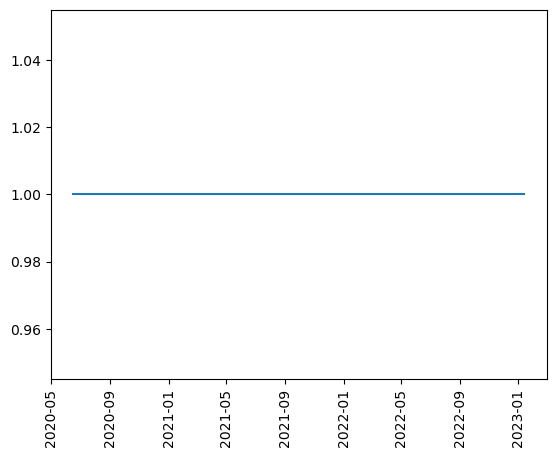

In [28]:
time_series['datetime'] = pd.to_datetime(time_series['datetime'])
time_series = time_series.sort_values('datetime', ascending=True)
plt.plot(time_series['datetime'], time_series['count'])
plt.xticks(rotation='vertical')
plt.show()

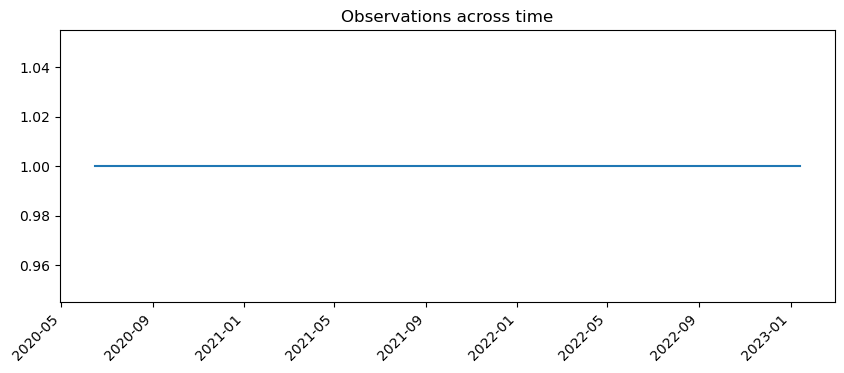

In [31]:
time_series.plot(x='datetime', y='count', kind='line', rot=45, legend=None, 
        title='Observations across time', xlabel='', fontsize=10, figsize=(10,4));

In [33]:
monthly_ts = time_series.groupby(time_series.datetime.dt.month)['count'].sum()

In [37]:
monthly_ts.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dec']

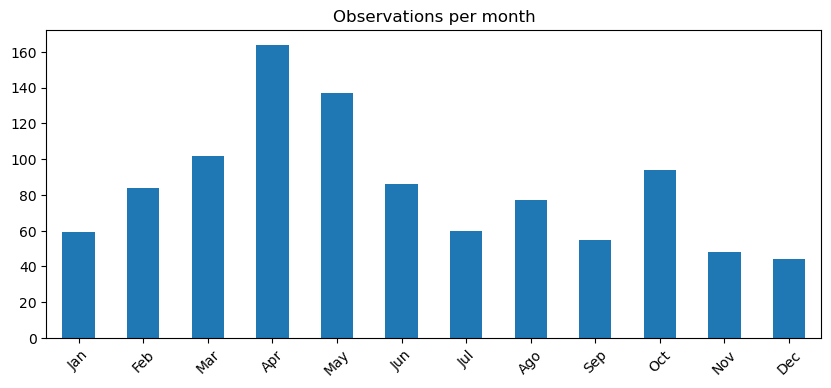

In [39]:
monthly_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
        title='Observations per month', xlabel='', fontsize=10, figsize=(10,4));

In [40]:
dayly_ts = time_series.groupby(time_series.datetime.dt.day)['count'].sum()

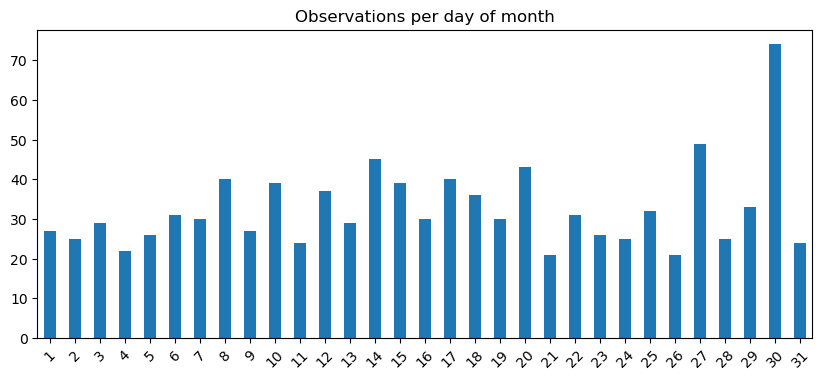

In [42]:
dayly_ts.plot(x='datetime', y='count', kind='bar', rot=45, legend=None, 
        title='Observations per day of month', xlabel='', fontsize=10, figsize=(10,4));

#### Dataset Columns Descriptive Analysis

Dataset Contents
Column: Timestamp
Column Type: object
See Converved_Timestamp column below for a detailed analysis.
Sample value: 2021-03-17T06:55:09.874Z
Number of unique values: 1010
Percentage of unique values: 100.00%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: TAS20
Column Type: int64
Sample value: 71
Number of unique values: 65
Percentage of unique values: 6.44%
Number of missing values: 0
Percentage of missing values: 0.00%

        count      mean        std   min   25%   50%   75%    max
TAS20  1010.0  67.39901  11.705005  25.0  61.0  69.0  75.0  100.0

Column TAS20 values frequency:


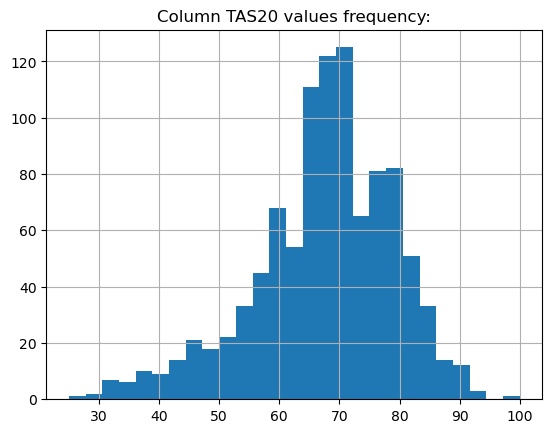

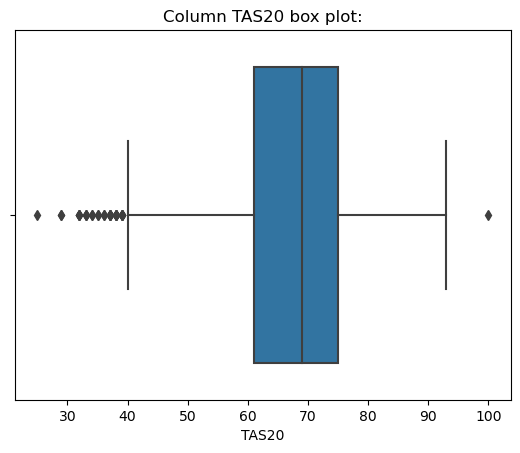

---
Column: F1
Column Type: int64
Sample value: 30
Number of unique values: 29
Percentage of unique values: 2.87%
Number of missing values: 0
Percentage of missing values: 0.00%

     count       mean       std  min   25%   50%   75%   max
F1  1010.0  25.517822  5.550041  7.0  23.0  26.0  29.0  35.0

Column F1 values frequency:


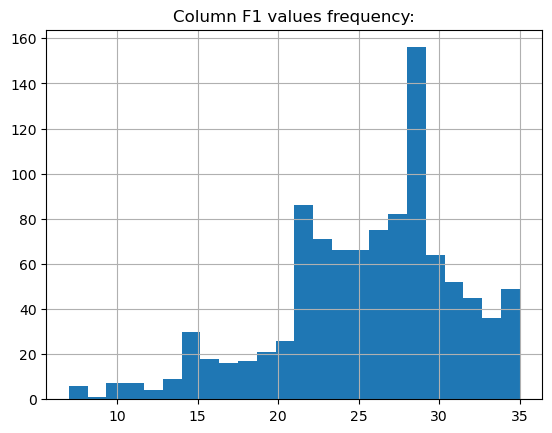

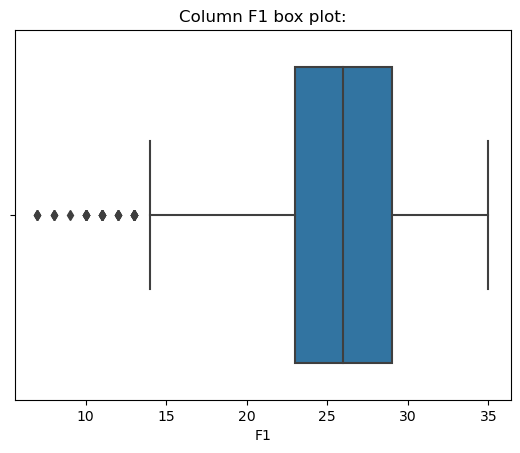

---
Column: F2
Column Type: int64
Sample value: 21
Number of unique values: 21
Percentage of unique values: 2.08%
Number of missing values: 0
Percentage of missing values: 0.00%

     count       mean       std  min   25%   50%   75%   max
F2  1010.0  19.107921  4.170694  5.0  17.0  20.0  22.0  25.0

Column F2 values frequency:


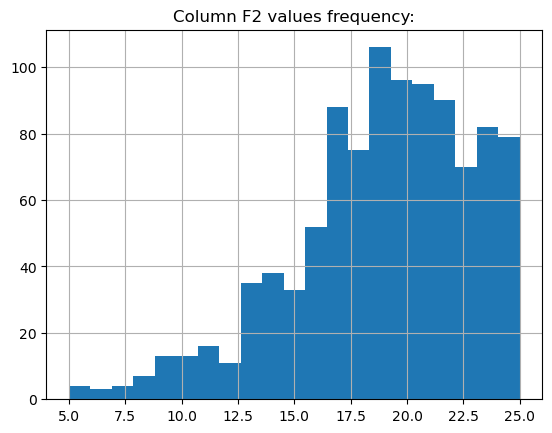

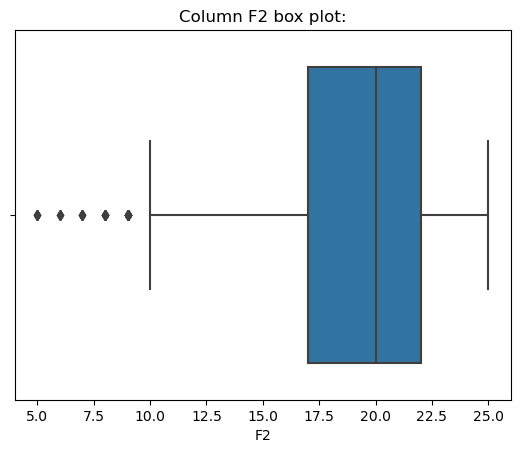

---
Column: F3
Column Type: int64
Sample value: 20
Number of unique values: 31
Percentage of unique values: 3.07%
Number of missing values: 0
Percentage of missing values: 0.00%

     count       mean       std  min   25%   50%    75%   max
F3  1010.0  22.773267  5.364705  8.0  19.0  23.0  26.75  40.0

Column F3 values frequency:


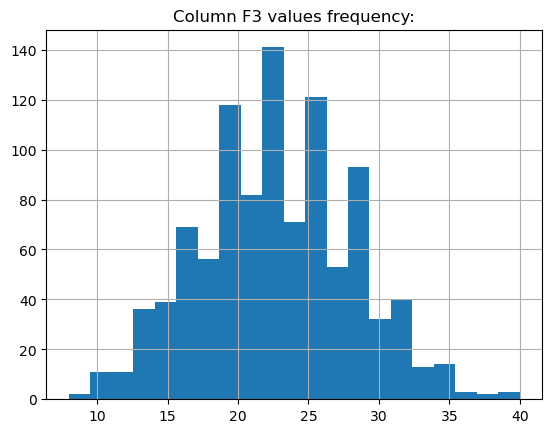

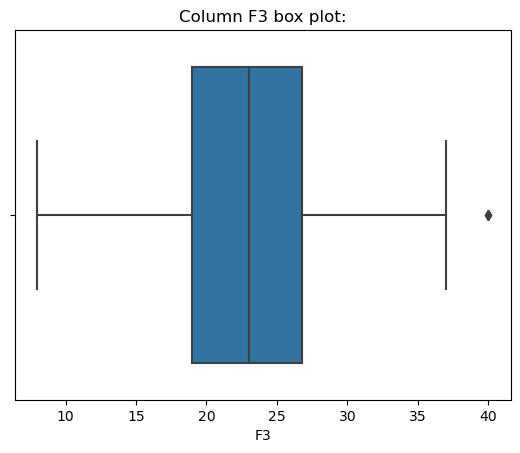

---
Column: Gender
Column Type: int64
Sample value: 2
Number of unique values: 3
Percentage of unique values: 0.30%
Number of missing values: 0
Percentage of missing values: 0.00%

         count      mean       std  min  25%  50%  75%  max
Gender  1010.0  1.880198  0.401316  1.0  2.0  2.0  2.0  3.0

Column Gender values frequency:


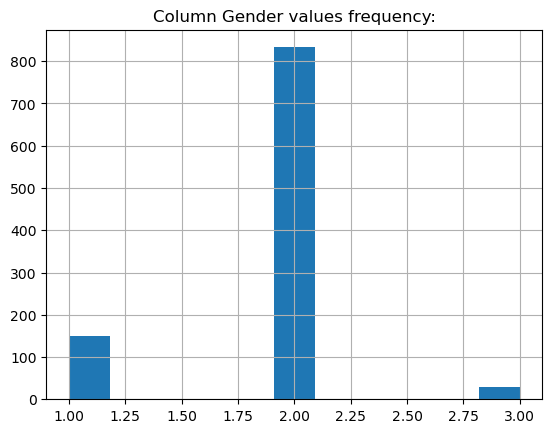

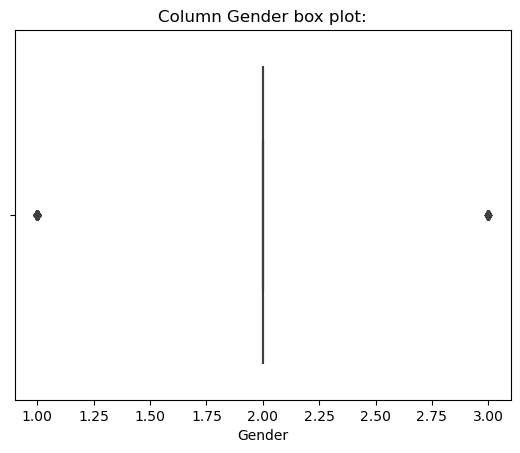

---
Column: Age
Column Type: int64
Sample value: 20
Number of unique values: 45
Percentage of unique values: 4.46%
Number of missing values: 0
Percentage of missing values: 0.00%

      count       mean       std   min   25%   50%   75%   max
Age  1010.0  23.167327  9.057613  18.0  18.0  18.0  24.0  68.0

Column Age values frequency:


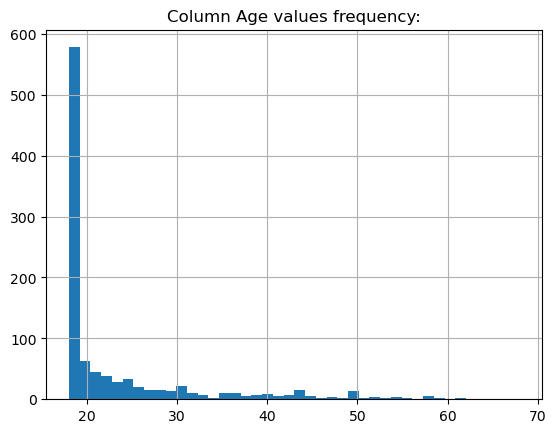

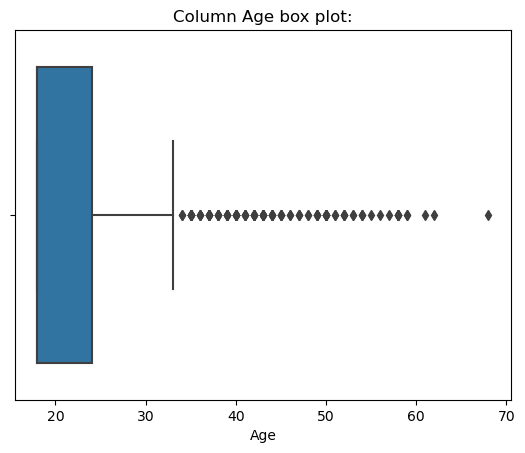

---
Column: Code
Column Type: object
See Converved_Code column below for a detailed analysis.
Sample value: 8b45a0f1b5fad1e453f0ac5ccb905fa7
Number of unique values: 947
Percentage of unique values: 93.76%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: Alexithymia
Column Type: object
See Converved_Alexithymia column below for a detailed analysis.
Sample value: POSITIVE
Number of unique values: 2
Percentage of unique values: 0.20%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: Timestamp (1)
Column Type: object
See Converved_Timestamp (1) column below for a detailed analysis.
Sample value: 2021-03-17T07:39:24.457Z
Number of unique values: 947
Percentage of unique values: 93.76%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: DateDiff_TAS20_NLP
Column Type: int64
Sample value: 0
Number of unique values: 43
Percentage of unique values: 4.26%
Number of missing values: 0
Percentage of missing values: 0.00%


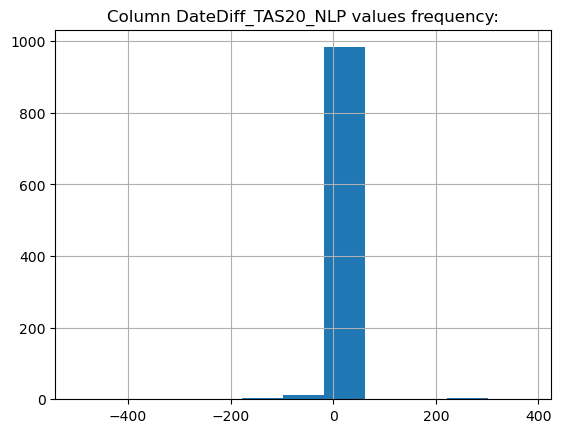

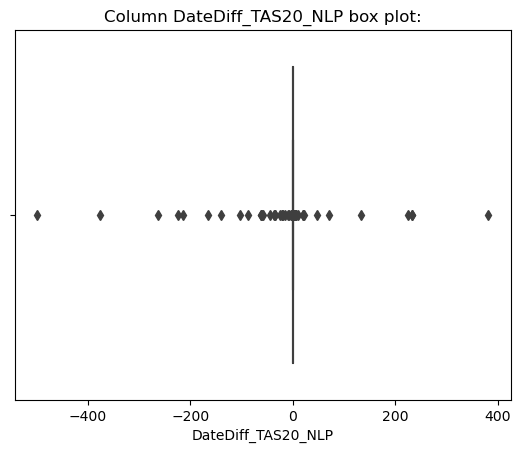

---
Column: Text_Card1
Column Type: object
See Converved_Text_Card1 column below for a detailed analysis.
Sample value:  ... un niño, común, como cualquier otro, salía de casa, iba a la escuela, tenía amigos, su familia lo amaba, no tenía nada que envidiar a nadie, sin embargo, no era feliz, y mucho menos se sentía libre, su sueño se hallaba frente a él, y aunque todo el mundo le decía que podía hacerlo, él no se sentía capaz de hacerlo, por lo cuál, se conformaba con hacer lo que los demás le decían, y aunque por momentos tomara ese violín y se sentía en el paraíso, no lograba permanecer ahí mucho tiempo, pues la realidad siempre lo alcanzaba y lo hacía regresar a esa vida, a la que todo el mundo le decía que estaba destinado.

Number of unique values: 945
Percentage of unique values: 93.56%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: Text_Card9VH
Column Type: object
See Converved_Text_Card9VH column below for a detailed analysis.
Sample value:  ... un 

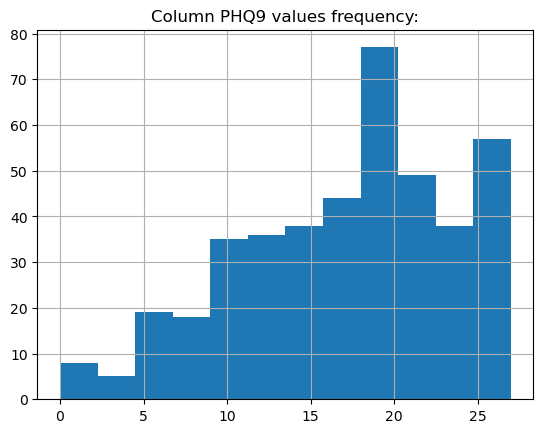

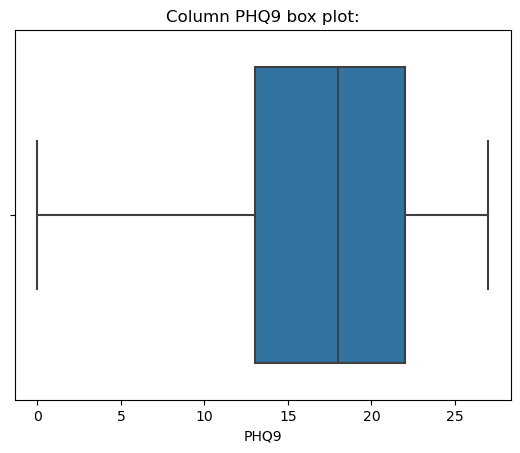

---
Column: I1
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I1  424.0  2.068396  0.963907  0.0  1.0  2.0  3.0  3.0

Column I1 values frequency:


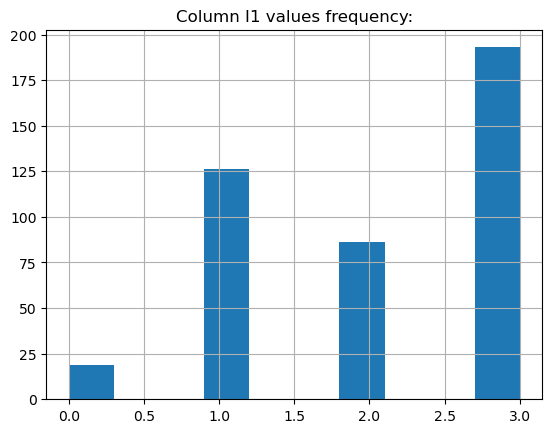

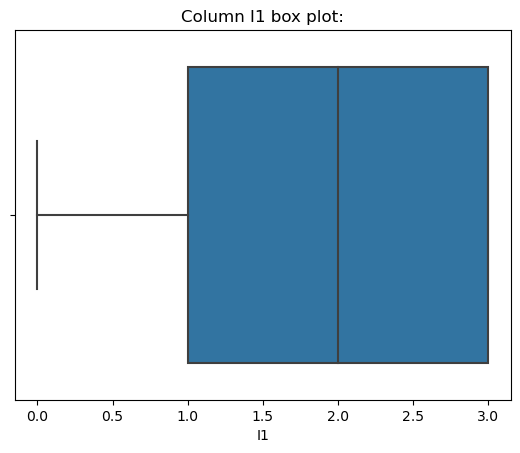

---
Column: I2
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I2  424.0  1.976415  0.979415  0.0  1.0  2.0  3.0  3.0

Column I2 values frequency:


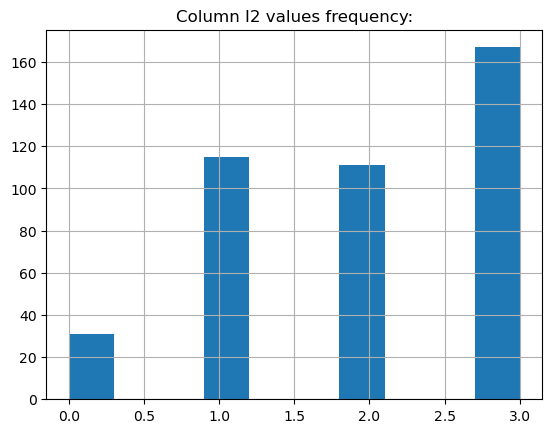

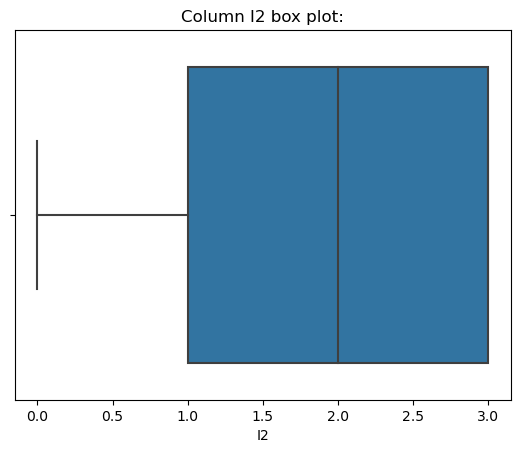

---
Column: I3
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min   25%  50%  75%  max
I3  424.0  2.238208  0.973576  0.0  1.75  3.0  3.0  3.0

Column I3 values frequency:


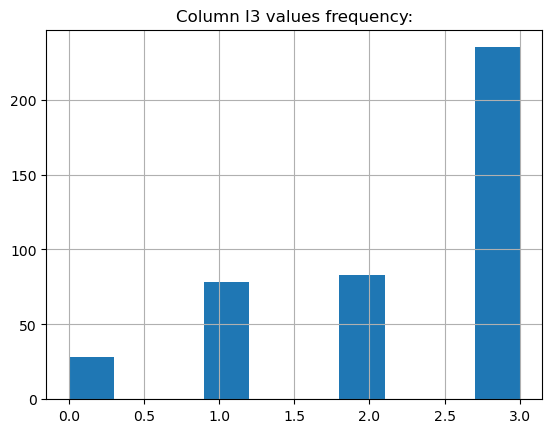

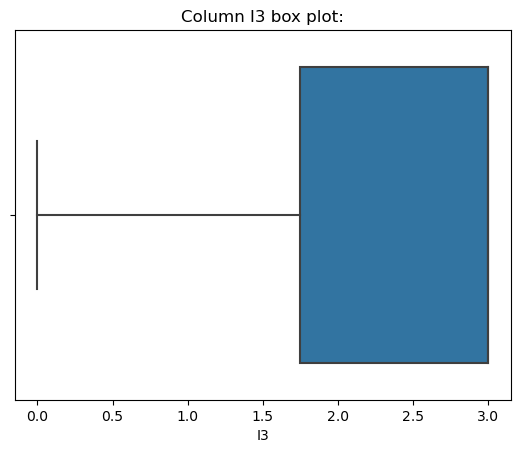

---
Column: I4
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I4  424.0  2.207547  0.929851  0.0  1.0  3.0  3.0  3.0

Column I4 values frequency:


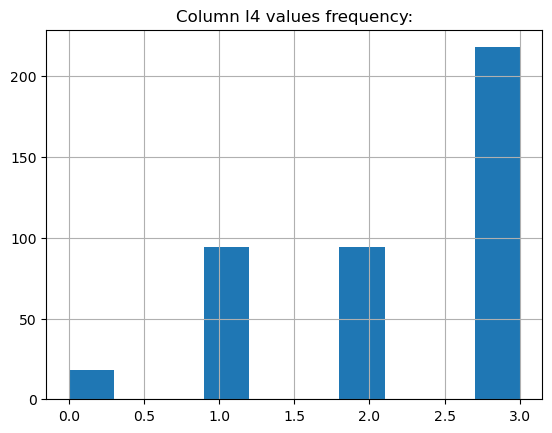

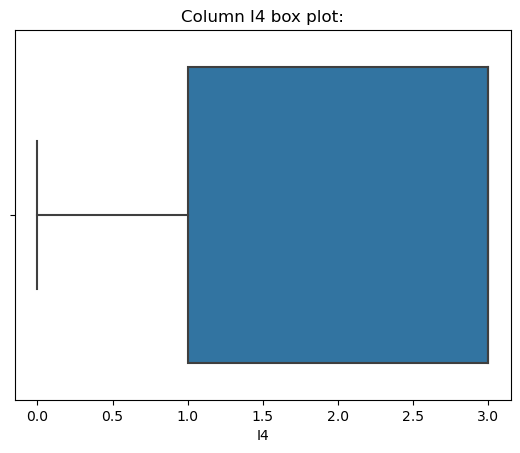

---
Column: I5
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I5  424.0  2.028302  1.046959  0.0  1.0  2.0  3.0  3.0

Column I5 values frequency:


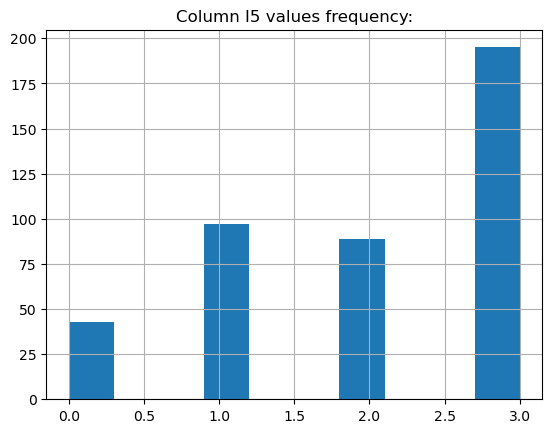

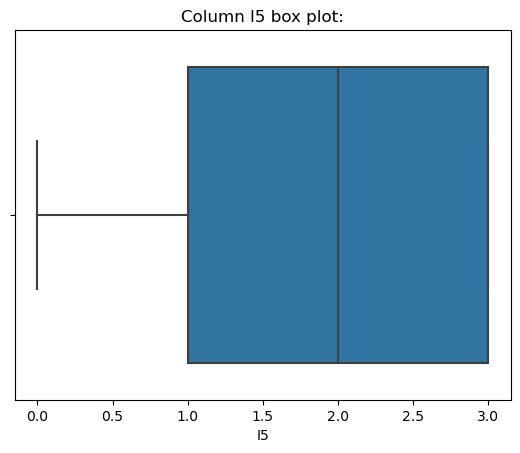

---
Column: I6
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I6  424.0  2.148585  1.031008  0.0  1.0  3.0  3.0  3.0

Column I6 values frequency:


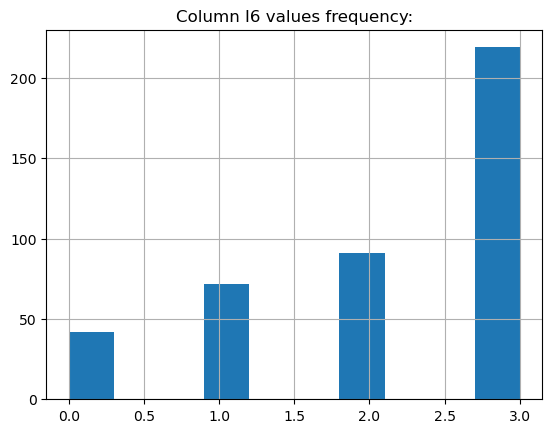

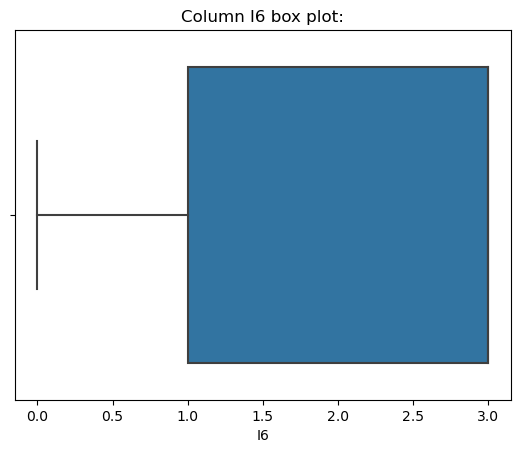

---
Column: I7
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count     mean       std  min  25%  50%  75%  max
I7  424.0  1.71934  1.104045  0.0  1.0  2.0  3.0  3.0

Column I7 values frequency:


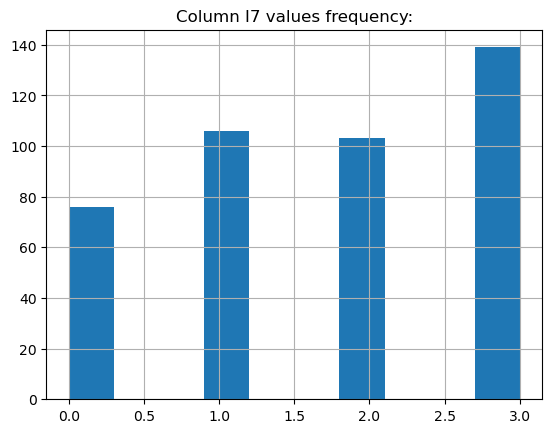

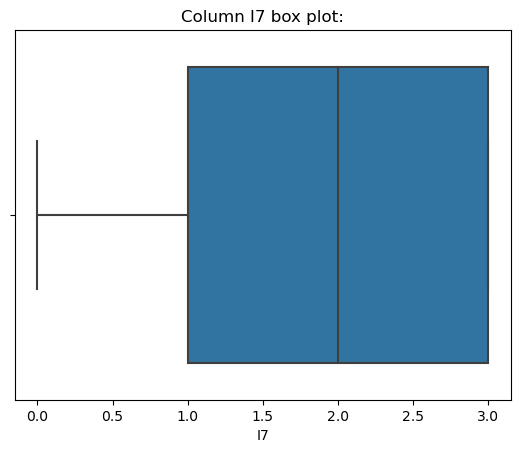

---
Column: I8
Column Type: float64
Sample value: 1.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I8  424.0  1.254717  1.109267  0.0  0.0  1.0  2.0  3.0

Column I8 values frequency:


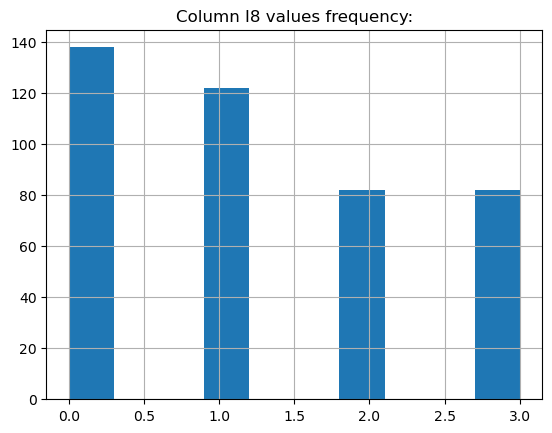

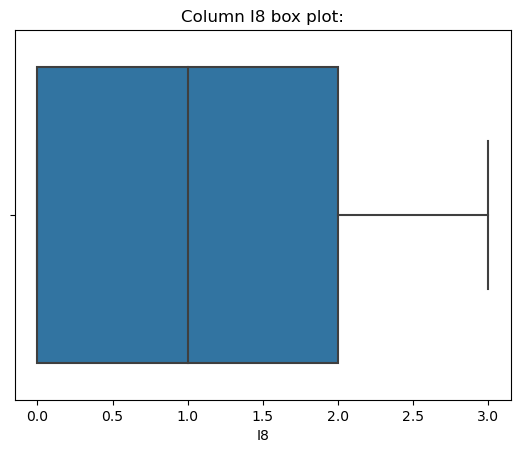

---
Column: I9
Column Type: float64
Sample value: 0.0
Number of unique values: 5
Percentage of unique values: 0.50%
Number of missing values: 586
Percentage of missing values: 58.02%

    count      mean       std  min  25%  50%  75%  max
I9  424.0  1.448113  1.213457  0.0  0.0  1.0  3.0  3.0

Column I9 values frequency:


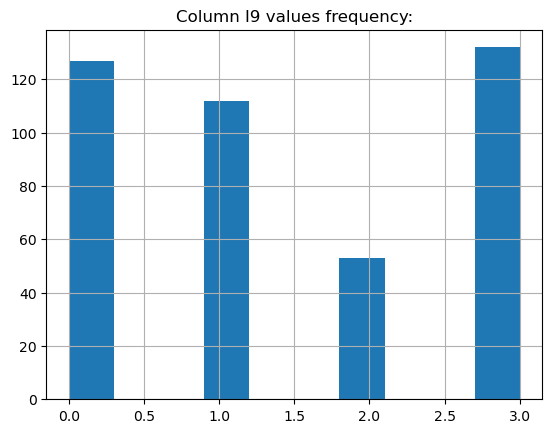

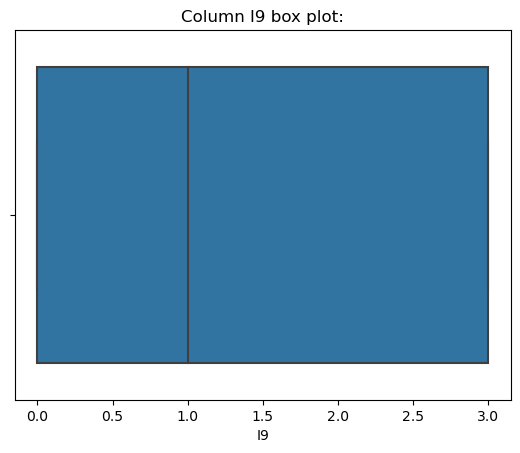

---
Column: Depression
Column Type: object
See Converved_Depression column below for a detailed analysis.
Sample value: POSITIVE
Number of unique values: 3
Percentage of unique values: 0.30%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: BAI
Column Type: float64
Sample value: 19.0
Number of unique values: 61
Percentage of unique values: 6.04%
Number of missing values: 576
Percentage of missing values: 57.03%

     count       mean        std  min   25%   50%   75%   max
BAI  434.0  29.864055  13.417869  1.0  20.0  29.0  39.0  72.0

Column BAI values frequency:


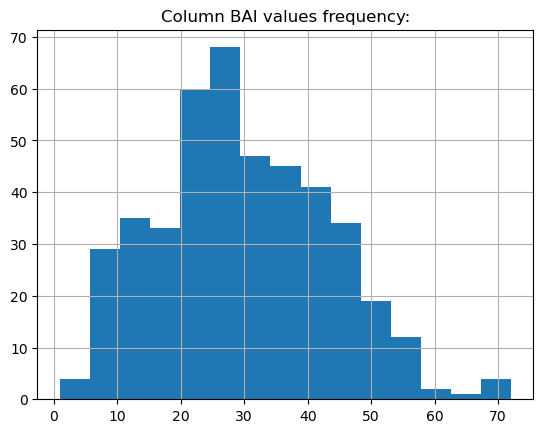

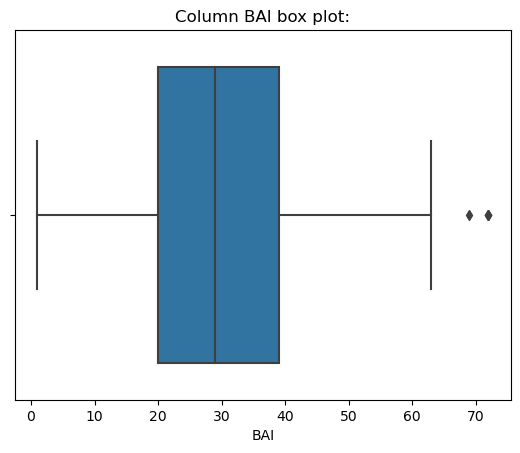

---
Column: Anxiety
Column Type: object
See Converved_Anxiety column below for a detailed analysis.
Sample value: POSITIVE
Number of unique values: 3
Percentage of unique values: 0.30%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: PSS
Column Type: float64
Sample value: 41.0
Number of unique values: 44
Percentage of unique values: 4.36%
Number of missing values: 665
Percentage of missing values: 65.84%

     count       mean       std   min   25%   50%   75%   max
PSS  345.0  37.614493  8.297122  12.0  33.0  38.0  43.0  69.0

Column PSS values frequency:


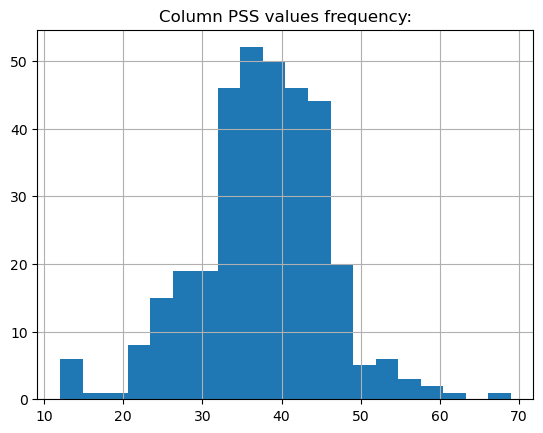

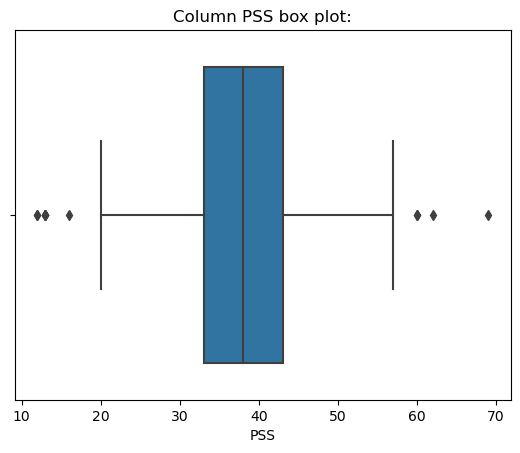

---
Column: AN
Column Type: float64
Sample value: 37.0
Number of unique values: 42
Percentage of unique values: 4.16%
Number of missing values: 570
Percentage of missing values: 56.44%

    count       mean       std   min   25%   50%   75%   max
AN  440.0  30.220455  9.225055  10.0  24.0  29.0  37.0  50.0

Column AN values frequency:


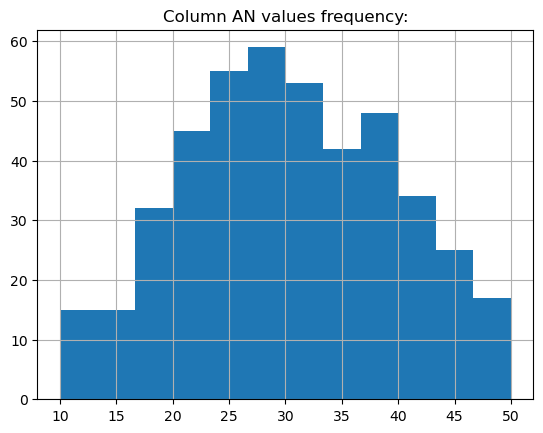

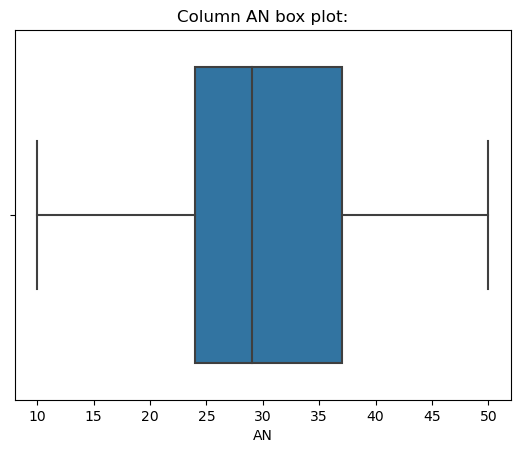

---
Column: AP
Column Type: float64
Sample value: 14.0
Number of unique values: 35
Percentage of unique values: 3.47%
Number of missing values: 570
Percentage of missing values: 56.44%

    count    mean       std   min   25%   50%   75%   max
AP  440.0  23.075  7.113868  10.0  17.0  23.0  28.0  47.0

Column AP values frequency:


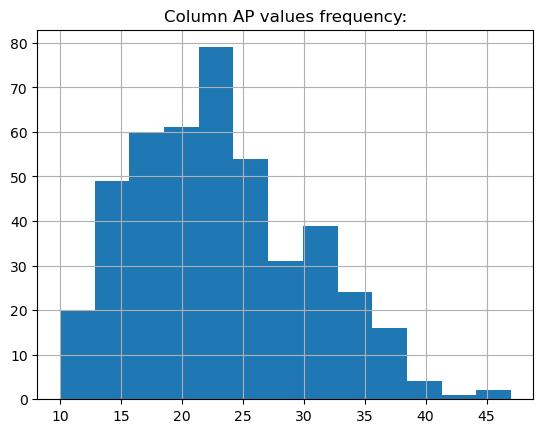

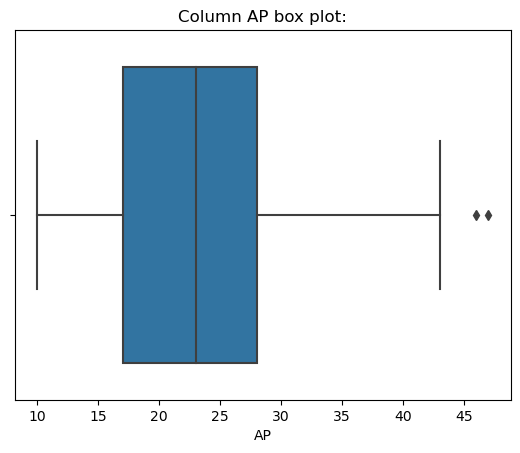

---
Column: Text_Card1_en
Column Type: object
See Converved_Text_Card1_en column below for a detailed analysis.
Sample value: ... a common child, like any other, left home, went to school, had friends, his family loved him, he had nothing to envy anyone, however, he was not happy, let alone felt free , his dream was in front of him, and although everyone told him that he could do it, he did not feel capable of doing it, for which, he was content to do what others told him, and although at times he took that violin and he felt in paradise, he could not stay there for long, because reality always caught up with him and made him return to that life, to which everyone told him he was destined.
Number of unique values: 943
Percentage of unique values: 93.37%
Number of missing values: 0
Percentage of missing values: 0.00%
---
Column: Text_Card9VH_en
Column Type: object
See Converved_Text_Card9VH_en column below for a detailed analysis.
Sample value: ... a man who was drunk with his friends
N

<Figure size 640x480 with 0 Axes>

In [19]:
blank_line(pdf)
duoprint("Dataset Contents", pdf, box=True)

for c in df.columns: 
    blank_line(pdf)
    
    # COLUMN NAME
    col_name = "Column: " + c
    duoprint(col_name, pdf, marker=True)
    
    # COLUMN TYPE
    type_info = "Column Type: " + str(df[c].dtype)
    duoprint(type_info, pdf)
    
    # OBJECT COLUMNS ARE ANALYZED USING THEIR "Converted_" versions
    if df[c].dtype == 'object':
        duoprint("See Converved_" + c + " column below for a detailed analysis.", pdf, warning=True)
        
    # SAMPLE VALUE
    sample_info = "Sample value: " + str(df[c].sample(n=1, ignore_index=True, random_state=r_seed).iloc[-1])
    duoprint(sample_info, pdf)
    
    # NUMBER OF UNIQUE VALUES
    num_unique = len(df[c].unique())
    num_unique_info = "Number of unique values: " + str(num_unique)
    duoprint(num_unique_info, pdf)
    
    # PERCENTAGE OF UNIQUE VALUES
    pct_unique = (num_unique/n_rows)*100
    pct_unique_info = f'Percentage of unique values: {pct_unique:.2f}%'
    duoprint(pct_unique_info, pdf)
    
    # NUMBER OF MISSING VALUES
    num_missing = df[c].isna().sum()
    num_missing_info = "Number of missing values: " + str(num_missing)
    duoprint(num_missing_info, pdf)
    
    # PERCENTAGE OF MISSING VALUES
    pct_missing = (num_missing/n_rows)*100
    pct_unique_info = f'Percentage of missing values: {pct_missing:.2f}%'
    duoprint(pct_unique_info, pdf)
    if (pct_missing > PCT_MISSING_THRESHOLD):
        duoprint("Warning: too missing values in column " + c, pdf, warning=True)
    
    # For time series features
    if is_datetime(df[c]):
        start_date = df[c].min()
        duoprint(f'Global Series Start Datetime: {start_date}',pdf)
        end_date = df[c].max()
        duoprint(f'Global Series End Datetime: {end_date}',pdf)
        period_length = end_date - start_date
        duoprint(f'Global Series Period: {period_length}',pdf)
        
    
    # For numeric features
    if (df[c].dtype.kind in 'iufc'): 
        
        # Transposed stats description
        df_desc_t = pd.DataFrame(np.array(df[c].describe().tolist()), columns=[c]).T
        df_desc_t.columns = df[c].describe().index.tolist()
        
        # stats desc df
        df_desc = pd.DataFrame({'Stats':df[c].describe().index.tolist(),
                                 c:df[c].describe().tolist()})    
        
        print_table(df_desc, "Column Statistics", pdf)
        blank_line(pdf)
        print()
        print(df_desc_t)       
        print()
    
    # For numeric and boolean features
    # biufc: b bool, i int (signed), u unsigned int, f float, c complex
    if (df[c].dtype.kind in 'biufc'): 
        
        # print("Generating histogram...")
        hist_info = "Column " + c + " values frequency:"
        hist = df[c].hist(bins='auto')
        hist_img = './imgs/hist_'+c+'.png'
        duoprint(hist_info, pdf)
        plt.title(hist_info)
        plt.savefig(hist_img, transparent=False, facecolor='white', bbox_inches="tight")        
        plt.show()
        plt.clf()
        pdf.image(hist_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')
    
        # print("Generating boxplot...")
        boxplot_info = "Column " + c + " box plot:"
        boxplot_img = './imgs/bp_'+c+'.png'
        sns.boxplot(x=df[c])
        plt.title(boxplot_info)
        plt.savefig(boxplot_img, transparent=False, facecolor='white', bbox_inches="tight") 
        plt.show()
        plt.clf()
        pdf.image(boxplot_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')

    print("---")
    # input("Press any key")

In [18]:
pdf.output(f'./EDA_report.pdf', 'F')

''

### Data Quality check

#### Label quality check (for supervised learning)

### Correlational Analysis